<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [1]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [3]:
# Ваш код здесь
data.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак *age*) женщин?**

In [4]:
# Ваш код здесь
data[data.sex == "Female"].age.mean()

36.85823043357163

**3. Какова доля граждан Германии (признак *native-country*)?**

In [5]:
# Ваш код здесь
is_from_germany = data["native-country"] == "Germany"
germans = data[is_from_germany]

In [6]:
number_of_germans = germans.shape[0]
total_number_of_people = data.shape[0]
print "Доля граждан Германии: %f" % (float(number_of_germans)/total_number_of_people)

Доля граждан Германии: 0.004207


**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

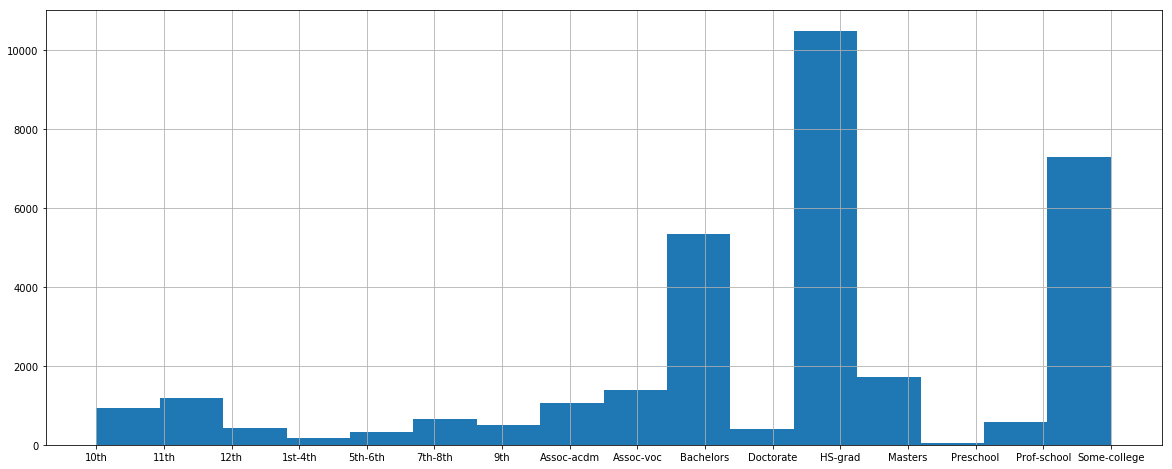

In [7]:
# Ваш код здесь
number_of_education_levels = data.education.unique().size
data.education.hist(bins=number_of_education_levels, figsize=(20,8))

**5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [8]:
people_groupped_by_salary = data.groupby(data.salary)

In [9]:
print "Средний возраст людей в зависимости от их дохода:"
people_groupped_by_salary.age.mean()

Средний возраст людей в зависимости от их дохода:


salary
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64

In [10]:
print "Среднеквадратичное отклонение возраста людей в зависимости от их дохода:"
people_groupped_by_salary.age.std()

Среднеквадратичное отклонение возраста людей в зависимости от их дохода:


salary
<=50K    14.020088
>50K     10.519028
Name: age, dtype: float64

**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [11]:
# Ваш код здесь
people_with_high_salary = data[data.salary == ">50K"]
good_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]

In [12]:
success_counter = 0
failure_counter = 0

for (index, person) in people_with_high_salary.iterrows():
    if person.education in good_education:
        success_counter += 1
    else:
        failure_counter += 1
        
print "С высшим образованием: %d" % success_counter
print "Без высшего образование: %d" % failure_counter

С высшим образованием: 4535
Без высшего образование: 3306


**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [13]:
# Ваш код здесь
data.groupby([data.race, data.sex]).describe()

age                                          \
                             count       mean        std   min   25%   50%   
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                                       capital-gain               ...   \
                             75%   max        count         mean  ...    
race               sex                                            ...    
Amer-Indian-Eskimo Female  46.00  80.0        119.0   544.605042  ...    
                   Male    45.00  82.0        192.0   675.260417  ...    
Asian-Pac-Islander Female  43.75  75.0        346.0   778.436416  ...    
                   Male    46.00  90.0        693.0  1827.813853  ...    
Black              Female  46.00  90.0       1555.0   516.593569  ...    
                   Male    46.00  90.0       1569.0   702.454430  ...    
Other              Female  39.00  74.0        109.0   254.669725  ...    
                   Male    42.00  77.0        162.0  1392.185185  ...    
White              Female  46.00  90.0       8642.0   573.610391  ...    
                   Male    49.00  90.0      19174.0  1368.674455  ...    

                              fnlwgt            hours-per-week             \
                                 75%        max          count       mean   
race               sex                                                      
Amer-Indian-Eskimo Female  163027.50   445168.0          119.0  36.579832   
                   Male    182656.00   356015.0          192.0  42.197917   
Asian-Pac-Islander Female  175705.75   379046.0          346.0  37.439306   
                   Male    200117.00   506329.0          693.0  41.468975   
Black              Female  253759.00   930948.0         1555.0  36.834084   
                   Male    298601.00  1268339.0         1569.0  39.997451   
Other              Female  219441.00   388741.0          109.0  35.926606   
                   Male    253334.75   481175.0          162.0  41.851852   
White              Female  224836.50  1484705.0         8642.0  36.296691   
                   Male    236858.75  1455435.0        19174.0  42.668822   

                                                                   
                                 std  min   25%   50%   75%   max  
race               sex                                             
Amer-Indian-Eskimo Female  11.046509  4.0  35.0  40.0  40.0  84.0  
                   Male    11.596280  3.0  40.0  40.0  45.0  84.0  
Asian-Pac-Islander Female  12.479459  1.0  35.0  40.0  40.0  99.0  
                   Male    12.387563  1.0  40.0  40.0  45.0  99.0  
Black              Female   9.419960  2.0  35.0  40.0  40.0  99.0  
                   Male    10.909413  1.0  40.0  40.0  40.0  99.0  
Other              Female  10.300761  6.0  30.0  40.0  40.0  65.0  
                   Male    11.084779  5.0  40.0  40.0  40.0  98.0  
White              Female  12.190951  1.0  30.0  40.0  40.0  99.0  
                   Male    12.194633  1.0  40.0  40.0  50.0  99.0  

[10 rows x 48 columns]

Ответ: 82

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [14]:
# Ваш код здесь
is_married_status = ((data["marital-status"] == "Married-civ-spouse") |
                     (data["marital-status"] == "Married-spouse-absent") |
                     (data["marital-status"] =="Married-AF-spouse"))

married_males = data[ (data.sex == "Male") & (is_married_status) ]
not_married_males = data[ (data.sex == "Male") & (is_married_status == False) ]

In [15]:
rich_married_males_ratio = (married_males.salary == ">50K").sum() / float(married_males.shape[0])
not_rich_married_males_ratio = (not_married_males.salary == ">50K").sum() / float(not_married_males.shape[0])

In [16]:
print "Доля женатых мужчин, зарабатывающих много: %.3f" % rich_married_males_ratio
print "Доля холостых мужчин, зарабатывающих много: %.3f" % not_rich_married_males_ratio

Доля женатых мужчин, зарабатывающих много: 0.441
Доля холостых мужчин, зарабатывающих много: 0.084


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [17]:
# Ваш код здесь
max_hours_per_week = data["hours-per-week"].max()
print "Максимальная продолжительность рабочей недели для людей из выборки: %d" % max_hours_per_week

Максимальная продолжительность рабочей недели для людей из выборки: 99


In [18]:
people_who_work_hardest = data[data["hours-per-week"] == max_hours_per_week]
print "Количество людей, работающих %d часов: %d" % (max_hours_per_week, people_who_work_hardest.shape[0])

Количество людей, работающих 99 часов: 85


In [19]:
rich_hardworkers = people_who_work_hardest[people_who_work_hardest.salary == ">50K"]
rich_hardworkers_percentace = rich_hardworkers.shape[0] / float(people_who_work_hardest.shape[0]) * 100
print "Среди них зарабатывает много %.1f процентов." % rich_hardworkers_percentace

Среди них зарабатывает много 29.4 процентов.


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [20]:
# Ваш код здесь
data.groupby(["native-country", "salary"])["hours-per-week"].mean()

native-country              salary
?                           <=50K     40.164760
                            >50K      45.547945
Cambodia                    <=50K     41.416667
                            >50K      40.000000
Canada                      <=50K     37.914634
                            >50K      45.641026
China                       <=50K     37.381818
                            >50K      38.900000
Columbia                    <=50K     38.684211
                            >50K      50.000000
Cuba                        <=50K     37.985714
                            >50K      42.440000
Dominican-Republic          <=50K     42.338235
                            >50K      47.000000
Ecuador                     <=50K     38.041667
                            >50K      48.750000
El-Salvador                 <=50K     36.030928
                            >50K      45.000000
England                     <=50K     40.483333
                            >50K      44.533333
Franc